In [17]:
import matplotlib
import matplotlib.pyplot as pt
%matplotlib inline
matplotlib.style.use('ggplot')

import torch.optim as optim

from envs.my_mdp import StochasticMDPEnv
from envs.tetris import Tetris
from agents.my_hdqn_agent import hDQN, OptimizerSpec
from my_hdqn_learning import hdqn_learning
from utils.plotting import plot_episode_stats, plot_visited_states
from utils.schedule import LinearSchedule

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
NUM_EPISODES = 100000
# NUM_EPISODES = 12000
BATCH_SIZE = 128
GAMMA = 1.0
REPLAY_MEMORY_SIZE = 1000000
LEARNING_RATE = 0.00025
ALPHA = 0.95
EPS = 0.01

optimizer_spec = OptimizerSpec(
    constructor=optim.RMSprop,
    kwargs=dict(lr=LEARNING_RATE, alpha=ALPHA, eps=EPS),
)

exploration_schedule = LinearSchedule(5000, 0.1, 1)

agent = hDQN(
    optimizer_spec=optimizer_spec,
    replay_memory_size=REPLAY_MEMORY_SIZE,
    batch_size=BATCH_SIZE,
    num_goal=1,
    num_action=4 * 4
)

env = Tetris(4, 4)
# env = StochasticMDPEnv()

In [19]:
agent, stats, visits = hdqn_learning(
    env=env,
    agent=agent,
    num_episodes=NUM_EPISODES,
    exploration_schedule=exploration_schedule,
    gamma=GAMMA,
)

/home/eric/pytorch-hdqn/my_hdqn_learning.py:118: RuntimeWarning: invalid value encountered in scalar divide
  return agent, stats, {}
/home/eric/pytorch-hdqn/agents/my_hdqn_agent.py:131: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  if len(self.meta_replay_memory) < self.batch_size:
/home/eric/pytorch-hdqn/agents/my_hdqn_agent.py:190: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  self.ctrl_optimizer.zero_grad()
/home/eric/pytorch-hdqn/agents/my_hdqn_agent.py:157: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  self.meta_optimizer.zero_grad()


steps: 2 episode: 1 reward: 0.0 average: nan
intrinsic_reward: 1.0
steps: 5 episode: 2 reward: 40.0 average: 41.0
steps: 7 episode: 3 reward: 0.0 average: 21.0
steps: 8 episode: 4 reward: 0.0 average: 14.333333333333334
steps: 11 episode: 5 reward: 0.0 average: 11.0
steps: 13 episode: 6 reward: 0.0 average: 9.0
steps: 15 episode: 7 reward: 0.0 average: 7.666666666666667
steps: 16 episode: 8 reward: 0.0 average: 6.714285714285714
steps: 17 episode: 9 reward: 0.0 average: 6.0
steps: 19 episode: 10 reward: 0.0 average: 5.444444444444445
steps: 21 episode: 11 reward: 0.0 average: 5.0
steps: 23 episode: 12 reward: 0.0 average: 4.636363636363637
steps: 24 episode: 13 reward: 0.0 average: 4.333333333333334
steps: 26 episode: 14 reward: 0.0 average: 4.076923076923077
steps: 29 episode: 15 reward: 40.0 average: 6.714285714285714
steps: 30 episode: 16 reward: 0.0 average: 6.333333333333333
steps: 32 episode: 17 reward: 0.0 average: 6.0
steps: 35 episode: 18 reward: 0.0 average: 5.705882352941177

KeyboardInterrupt: 

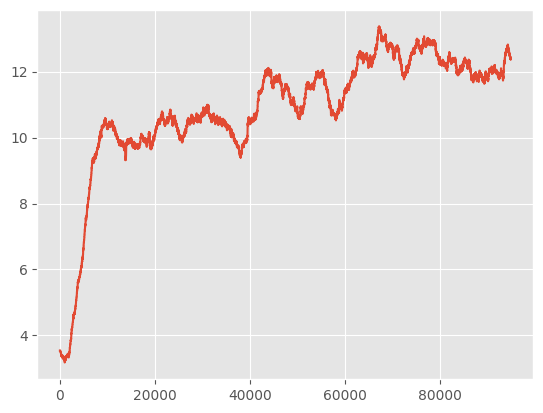

In [ ]:
import numpy as np
episode_returns = stats.episode_rewards
window_size = 5000
moving_average = np.convolve(episode_returns, np.ones(window_size), 'valid') / window_size
pt.plot(moving_average)
pt.savefig('moving_average')
# print(sum(stats.episode_rewards))
# plot_episode_stats(stats)